# Searching for AllWISE Atlas Images

This notebook tutorial demonstrates the process of querying IRSA's Simple Image Access (SIA) service for AllWISE Atlas images, making a cutout image (thumbnail), and displaying the cutout.

## Learning Goals

By the end of this tutorial, you will:

* Learn how to search the NASA Astronomical Virtual Observatory Directory web portal for a service that provides access to IRSA's WISE AllWISE Atlas (L3a) coadded images.
* Use the Python pyvo package to identify which of IRSA's AllWISE Atlas images cover a specified coordinate.
* Download one of the identified images.
* Create and display a cutout of the downloaded image.

## Introduction

The AllWISE program builds upon the work of the successful Wide-field Infrared Survey Explorer mission [(WISE; Wright et al. 2010)](http://adsabs.harvard.edu/abs/2010AJ....140.1868W) by combining data from the WISE cryogenic and NEOWISE [(Mainzer et al. 2011 ApJ, 731, 53)](http://adsabs.harvard.edu/abs/2011ApJ...731...53M) post-cryogenic survey phases to form the a comprehensive view of the full mid-infrared sky. The AllWISE Images Atlas is comprised of 18,240 4-band calibrated 1.56°x1.56° FITS images, depth-of-coverage and noise maps, and image metadata produced by coadding nearly 7.9 million Single-exposure images from all survey phases. For more information about the WISE mission, see:

https://irsa.ipac.caltech.edu/Missions/wise.html

The [NASA/IPAC Infrared Science Archive (IRSA)](https://irsa.ipac.caltech.edu) at Caltech is the archive for AllWISE images and catalogs. The AllWISE Atlas images that are the subject of this tutorial are made accessible via the [International Virtual Observatory Alliance (IVOA)](https://ivoa.net) [Simple Image Access (SIA)](https://wiki.ivoa.net/internal/IVOA/SiaInterface/SIA-V2-Analysis.pdf) protocol. IRSA's AllWISE SIA service is registered in the NASA Astronomical Virtual Observatory (NAVO) [Directory](https://vao.stsci.edu). Based on the registered information, the Python package [pyvo](https://pyvo.readthedocs.io) can be used to query the SEIP SIA service for a list of images that meet specified criteria, and standard Python libraries can be used to download and manipulate the images.
Other datasets at IRSA are available through other SIA services:

https://irsa.ipac.caltech.edu/docs/program_interface/api_images.html

## Imports

- *pyvo* for querying IRSA's AllWISE Atlas SIA service
- *astropy.coordinates* for defining coordinates
- *astropy.nddata* for creating an image cutout
- *astropy.wcs* for interpreting the World Coordinate System header keywords of a fits file
- *astropy.units* for attaching units to numbers passed to the SIA service
- *matplotlib.pyplot* for plotting
- *astropy.utils.data* for downloading files
- *astropy.io* to manipulate FITS files

In [1]:
# Uncomment the next line to install dependencies if needed.
# !pip install matplotlib astropy pyvo

In [2]:
import pyvo as vo
from astropy.coordinates import SkyCoord
from astropy.nddata import Cutout2D
from astropy.wcs import WCS
import astropy.units as u
import matplotlib.pyplot as plt
from astropy.utils.data import download_file
from astropy.io import fits

## Section 1 - Setup

Set images to display in the notebook

In [3]:
%matplotlib inline

Define coordinates of a bright star

In [4]:
ra = 314.30417
dec = 77.595559
pos = SkyCoord(ra=ra, dec=dec, unit='deg')

## Section 2 - Lookup and define a service for AllWISE Atlas images

Start at STScI VAO Registry at https://vao.stsci.edu/keyword-search/

Limit by Publisher "NASA/IPAC Infrared Science Archive" and Capability Type "Simple Image Access Protocol" then search on "AllWISE Atlas"

Locate the SIA2 URL https://irsa.ipac.caltech.edu/ibe/sia/wise/allwise/p3am_cdd?

In [5]:
allwise_service = vo.dal.SIAService("https://irsa.ipac.caltech.edu/ibe/sia/wise/allwise/p3am_cdd?")

## Section 3 - Search the service

Search for images covering within 1 arcsecond of the star

In [6]:
im_table = allwise_service.search(pos=pos, size=1.0*u.arcsec)

Inspect the table that is returned

In [7]:
im_table

<DALResultsTable length=4>
      sia_title        ...    coadd_id  
                       ...              
        object         ...     object   
---------------------- ... -------------
W4 Coadd 3150p772_ac51 ... 3150p772_ac51
W2 Coadd 3150p772_ac51 ... 3150p772_ac51
W3 Coadd 3150p772_ac51 ... 3150p772_ac51
W1 Coadd 3150p772_ac51 ... 3150p772_ac51

In [8]:
im_table.to_table().colnames

['sia_title',
 'sia_url',
 'cloud_access',
 'sia_naxes',
 'sia_fmt',
 'sia_ra',
 'sia_dec',
 'sia_naxis',
 'sia_crpix',
 'sia_crval',
 'sia_proj',
 'sia_scale',
 'sia_cd',
 'sia_bp_id',
 'sia_bp_ref',
 'sia_bp_hi',
 'sia_bp_lo',
 'sia_bp_unit',
 'magzp',
 'magzpunc',
 'unc_url',
 'cov_url',
 'coadd_id']

In [9]:
im_table.to_table()['sia_bp_id']

W4
W2
W3
W1


## Section 4 - Locate and download an image of interest

Let's search the image results for the W3 band image.

In [10]:
for i in range(len(im_table)):
    if im_table[i]['sia_bp_id'] == 'W3':
        break
print(im_table[i].getdataurl())

https://irsa.ipac.caltech.edu/ibe/data/wise/allwise/p3am_cdd/31/3150/3150p772_ac51/3150p772_ac51-w3-int-3.fits


Download the image and open it in Astropy

In [11]:
fname = download_file(im_table[i].getdataurl(), cache=True)
image1 = fits.open(fname)

## Section 5 - Extract a cutout and plot it

In [12]:
wcs = WCS(image1[0].header)

In [13]:
cutout = Cutout2D(image1[0].data, pos, (60, 60), wcs=wcs)
wcs = cutout.wcs

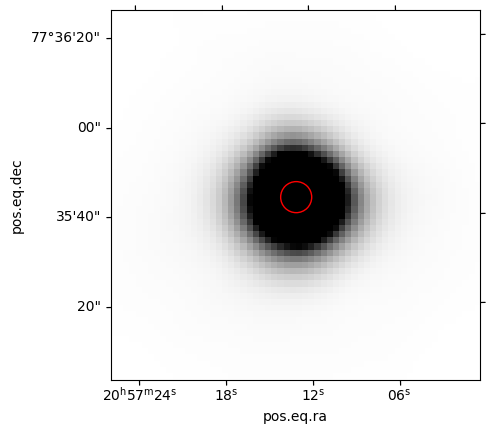

In [14]:
fig = plt.figure()

ax = fig.add_subplot(1, 1, 1, projection=wcs)
ax.imshow(cutout.data, cmap='gray_r', origin='lower',
          vmax = 1000)
ax.scatter(ra, dec, transform=ax.get_transform('fk5'), s=500, edgecolor='red', facecolor='none')

***

## About this notebook

**Author:** David Shupe, IRSA Scientist, and the IRSA Science Team

**Updated:** 2022-02-14

**Contact:** [the IRSA Helpdesk](https://irsa.ipac.caltech.edu/docs/help_desk.html) with questions or reporting problems.

## Citations

If you use `astropy` for published research, please cite the authors. Follow these links for more information about citing `astropy`:

* [Citing `astropy`](https://www.astropy.org/acknowledging.html)

Please include the following in any published material that makes use of the WISE data products:

"This publication makes use of data products from the Wide-field Infrared Survey Explorer, which is a joint project of the University of California, Los Angeles, and the Jet Propulsion Laboratory/California Institute of Technology, funded by the National Aeronautics and Space Administration."

Please also cite the dataset Digital Object Identifier (DOI): [10.26131/IRSA153](https://www.ipac.caltech.edu/doi/irsa/10.26131/IRSA153)